# LoC quanitifcation notebook

Takes previously defined thresholds and applies them across population subsets

In [560]:
from homuncu_loc import dataio
import pandas as pd
from tqdm.auto import tqdm
import os
import btrack
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from itertools import chain
import ast
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.weight'] = 'bold'

# Load image information

In [578]:
df = dataio.load_expt_dir()
df

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,Plate ID 1,Plate ID 2,Markers,ch0,ch1,ch2,ch3,condition,basename,location
1,112,112,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
2,113,113,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
3,114,114,iAT1_iAT2,1,['_iat2.h5'],TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,,,,,,,,Day7_static,,
4,121,121,iAT1_iAT2,3,"['_ch2_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
5,122,122,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,Day7_static,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1510,1510,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_mphi_sc_measurement...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
84,1511,1511,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat2.h5', '_iat1.h5', '_iat_sc_...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
85,1512,1512,macroph_iAT1_iAT2,5,"['_iat2.h5', '_iat1.h5', '_mphi.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
86,1513,1513,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_iat2.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...


In [579]:
fns = """20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445
20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_113
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_121
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_122
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_123
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_194
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_195
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_196
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_235
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_236
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_244
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_245
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_246
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_284
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_286
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_287"""
fns = fns.splitlines()
# fns

### Add sc_data_path to df and filter main df

In [580]:
# filter df
df = df[df['image_fn'].isin(fns)]
# Filter df to keep only the rows where 'threshold applied?' is not TRUE
df = df[df['threshold applied?'].str.upper() == 'TRUE']
# Initialize a new column for single cell data paths
df['sc_data_path'] = None

for fn in tqdm(fns, total=len(fns)):
    matching_rows = df[df['image_fn'] == fn]
    if not matching_rows.empty:
        image_dir = matching_rows.iloc[0]['image_location']
        sc_base_dir = image_dir.replace('images', 'sc_analyses') 
        sc_fn = None
        
        # Check if the specific file exists, and set sc_fn accordingly
        if os.path.exists(os.path.join(sc_base_dir, fn + '_iat2.h5')):
            sc_fn = fn + '_iat2.h5'
        elif os.path.exists(os.path.join(sc_base_dir, fn + '_z_tracks_masks.h5')):
            sc_fn = fn + '_z_tracks_masks.h5'
        else:
            print(f'Single cell data not found for {fn}')
            continue  # Skip to the next iteration of the loop
        
        sc_data_path = os.path.join(sc_base_dir, sc_fn)
        df.at[matching_rows.index[0], 'sc_data_path'] = sc_data_path


  0%|          | 0/33 [00:00<?, ?it/s]

# Load tracks

In [618]:
# Initialize the dictionary to store the tracks
tracks_dict = {}

# Add new columns for single-cell intensities
df['ch1_sc_intensities'] = None
df['ch2_sc_intensities'] = None



for index, row in tqdm(df.iterrows(), total=len(df)):
    image_id = row['ID']
    sc_data_path = row['sc_data_path']
    
    if pd.isnull(sc_data_path):
        print(f"sc_data_path is missing for ID: {image_id}")
        continue
    
    if 'iat2' in sc_data_path: 
        obj_type = 'obj_type_2'
    elif '_z_tracks_masks' in sc_data_path: 
        obj_type = 'obj_type_1'
    else:
        print(f"Unknown object type for ID: {image_id}")
        continue
    
    # Load the tracks
    with btrack.io.HDF5FileHandler(sc_data_path, 'r', obj_type=obj_type) as reader:
        tracks = [t for t in reader.tracks if len(t) >= 3]
        
    # Store the tracks in the dictionary using the ID as the key
    tracks_dict[image_id] = tracks

    # Calculate single-cell intensities for each channel
    ch1_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,1]) for t in tracks]
    ch2_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,2]) for t in tracks]
    
    # Add the single-cell intensities to the original DataFrame
    df.at[index, 'ch1_sc_intensities'] = str(ch1_sc_intensities)
    df.at[index, 'ch2_sc_intensities'] = str(ch2_sc_intensities)

    df['ch1_sc_intensities'] = df['ch1_sc_intensities'].apply(eval)
    df['ch2_sc_intensities'] = df['ch2_sc_intensities'].apply(eval)


  0%|          | 0/33 [00:00<?, ?it/s]

[INFO][2023/10/31 05:35:45 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5...
[INFO][2023/10/31 05:35:45 PM] Loading tracks/obj_type_2
[INFO][2023/10/31 05:35:45 PM] Loading LBEP/obj_type_2
[INFO][2023/10/31 05:35:45 PM] Loading objects/obj_type_2 (27786, 5) (27786 filtered: None)
[INFO][2023/10/31 05:35:46 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5
[INFO][2023/10/31 05:35:46 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_e

# Quantify according to condition

In [619]:
conditions = df['condition'].unique()
conditions

array(['Day7_static', 'Day7_breath', 'Day14_static', 'Day14_breath'],
      dtype=object)

In [584]:
channels = ['SPC', 'PDPN', 'NKX21']
channels

['SPC', 'PDPN', 'NKX21']

In [589]:
channel = 'PDPN'
condition = 'Day14_static'

In [590]:
print(df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]['ch1threshold'])


10    450
11    450
12       
13    500
14    600
15    600
Name: ch1threshold, dtype: object


In [586]:
condition, channel

('Day14_static', 'PDPN')

In [587]:
df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,ch0,ch1,ch2,ch3,condition,basename,location,sc_data_path,ch1_sc_intensities,ch2_sc_intensities
10,235,235,iAT1_iAT2,1,['_z_tracks_masks.h5'],TRUE,TRUE,,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[326.47104, 215.72816467285156, 1875.478881835...","[668.8106, 977.8380126953125, 1413.33569335937..."
11,236,236,iAT1_iAT2,1,['_z_tracks_masks.h5'],TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[1546.4792, 1307.549, 1474.2262, 273.351898193...","[1063.8911, 572.6517, 627.97174, 446.004455566..."
12,237,237,iAT1_iAT2,2,"['_ch1_threshold_quantification.png', '_iat2.h5']",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[1638.5602, 3314.0283, 193.73495, 1181.4307, 2...","[899.49457, 544.0726, 795.0935, 675.2108, 706...."
13,244,244,iAT1_iAT2,3,"['_z_tracks_masks.h5', '_ch2_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,SPC,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[2576.603759765625, 1649.65087890625, 3918.526...","[955.1233520507812, 1167.140380859375, 1257.30..."
14,245,245,iAT1_iAT2,3,"['_ch2_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,SPC,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[2228.7498, 2215.2053, 2432.239501953125, 1986...","[636.5758, 1501.6489, 905.905517578125, 617.20..."
15,246,246,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_ch2_th...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,...,DAPI,SPC,PDPN,ZO1,Day14_static,20x_21-12-028A_A23456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[1987.0377, 1970.0, 1872.9945068359375, 1918.6...","[697.88556, 1007.5206298828125, 1253.825317382..."


In [588]:
for condition in conditions:
    for channel in channels:
        print(df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]['ch1threshold'])
        print(df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]['ch2threshold'])

4    250
5    250
6    250
Name: ch1threshold, dtype: object
4    220
5    200
6    200
Name: ch2threshold, dtype: object
1    300
2    300
4    250
5    250
6    250
Name: ch1threshold, dtype: object
1    250
2    250
4    220
5    200
6    200
Name: ch2threshold, dtype: object
1    300
2    300
Name: ch1threshold, dtype: object
1    250
2    250
Name: ch2threshold, dtype: object
7      550
8      550
9      550
54    1100
55    1100
56    1100
Name: ch1threshold, dtype: object
7     250
8     250
9     250
54    170
55    170
56    170
Name: ch2threshold, dtype: object
7      550
8      550
9      550
51     150
52     135
53     175
54    1100
55    1100
56    1100
Name: ch1threshold, dtype: object
7     250
8     250
9     250
51    190
52    135
53    150
54    170
55    170
56    170
Name: ch2threshold, dtype: object
51    150
52    135
53    175
Name: ch1threshold, dtype: object
51    190
52    135
53    150
Name: ch2threshold, dtype: object
13    500
14    600
15    600
Name: c

In [600]:
df_subset

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,ch0,ch1,ch2,ch3,condition,basename,location,sc_data_path,ch1_sc_intensities,ch2_sc_intensities
16,284,284,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[226.26315307617188, 210.07547, 140.66667, 148...","[638.9802856445312, 487.01886, 788.3333, 322.0..."
17,286,286,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[669.2, 1053.728, 205.4470977783203, 114.98666...","[764.327, 809.41504, 1018.6259155273438, 254.8..."
18,287,287,iAT1_iAT2,2,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,20x_21-12-029B_A12346_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[302.7199, 282.16516, 775.33075, 457.931488037...","[1080.4225, 946.6321, 1197.8752, 370.310852050..."
57,1441,1441,iAT1_iAT2,5,"['_sc_results.csv', '_iat2.h5', '_sc_data_subs...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[165.44936, 192.8207, 168.7287, 174.7238, 155....","[130.69632, 135.50313, 130.22887, 128.15263, 1..."
58,1442,1442,iAT1_iAT2,2,"['_iat1.h5', '_iat2.h5']",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,,,/run/user/30046150/gvfs/smb-share:server=data2...,"[159.07692, 203.23289489746094, 247.26128, 189...","[146.3125, 148.85081481933594, 161.59244, 153...."
59,1443,1443,iAT1_iAT2,2,"['_iat1.h5', '_iat2.h5']",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,,,/run/user/30046150/gvfs/smb-share:server=data2...,"[246.98781, 196.7546, 219.94653, 229.3203, 188...","[145.29395, 143.65625, 140.5686, 148.96608, 12..."
64,1448,1448,iAT1_iAT2,2,"['_iat2.h5', '_iat1.h5']",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1...,...,DAPI,NKX21,PDPN,ZO1,Day14_breath,,,/run/user/30046150/gvfs/smb-share:server=data2...,"[264.2502, 242.5988, 219.83984, 294.3915, 242....","[139.98413, 160.4854, 144.17618, 152.81047, 15..."


In [606]:
sc_intensities

16    [226.26315307617188, 210.07547, 140.66667, 148...
17    [669.2, 1053.728, 205.4470977783203, 114.98666...
18    [302.7199, 282.16516, 775.33075, 457.931488037...
57    [165.44936, 192.8207, 168.7287, 174.7238, 155....
58    [159.07692, 203.23289489746094, 247.26128, 189...
59    [246.98781, 196.7546, 219.94653, 229.3203, 188...
64    [264.2502, 242.5988, 219.83984, 294.3915, 242....
Name: ch1_sc_intensities, dtype: object

In [627]:
threshold_series

1    300
2    300
Name: ch1threshold, dtype: object

In [632]:
for thresh, sc_ints in zip(threshold_series, sc_intensities):
    print(thresh, sc_ints)

300 [300.3113, 187.06544, 526.81085, 296.88693, 715.9424, 551.21716, 186.67862, 179.91785, 480.4377, 752.288, 271.353515625, 201.76227, 379.09528, 246.33467, 269.42938, 556.2266, 469.75, 466.01172, 408.7812, 191.8845, 297.58203, 223.9744, 459.73187, 770.7471, 644.0748, 207.25679, 387.15262, 199.35155, 140.51549, 256.57993, 434.78372, 536.79395, 376.36993, 135.4791, 322.90637, 375.6584, 537.53656, 390.8049, 540.62195, 239.63403, 461.95505, 378.4154, 570.5014, 633.2443, 236.6639, 426.11203, 668.57996, 276.99893, 235.23235, 400.896, 507.9859, 334.8093, 206.49179, 532.8164, 382.33948, 311.5475, 643.6332, 205.9904, 208.89772, 317.47208, 176.18698, 388.8357, 361.81482, 355.97253, 687.1669, 523.75684, 345.0839, 467.50354, 152.42708, 425.5486, 367.39273, 380.28494, 310.77475, 463.34567, 267.2887, 612.5507, 259.5117, 310.2441, 292.28738, 519.91516, 283.58994, 285.51495, 263.84164, 516.9599, 244.91205, 785.1691, 520.6479, 402.3574, 323.44125, 503.1209, 450.4966, 461.97418, 476.10175, 251.63431, 

In [639]:
def convert_string_to_float_list(s):
    # Remove the brackets and extra spaces
    s = s.strip("[]").strip()
    
    # Split the string by comma
    str_list = s.split(", ")
    
    # Convert each string to a float and store it in a new list
    float_list = [float(item) for item in str_list]
    
    return float_list


In [647]:
len([i for i in convert_string_to_float_list(sc_ints) if i >=300])/len(convert_string_to_float_list(sc_ints))

0.7683727034120735

In [637]:
sc_ints.apply(eval)

AttributeError: 'str' object has no attribute 'apply'

In [649]:
thresh

'300'

300 76.4591439688716
300 76.83727034120734
Day7_static average =  76.64820715503947


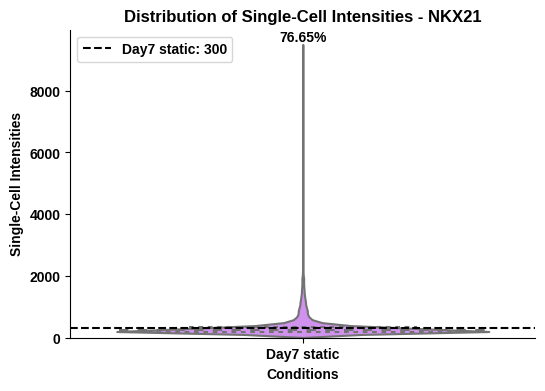

In [650]:
# Initialize a figure
plt.figure(figsize=(6, 4))

# Initialize a list to store the data for all conditions and thresholds
all_data = []
thresholds = []
labels = []
percentages_above_threshold = []
colors = []

# Define colors for Day7 and Day14
day7_color = "#d682fe"
day14_color = "#9336fe"

# Loop through conditions
for condition in conditions:
    # Filter the DataFrame for the current condition and channel
    df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
    
    # Find the column name for the channel enumeration
    str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
    
    # Get the threshold for the current condition and channel as a mean of all for that condition
    threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
    if not threshold_series.empty:
        numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
        threshold = int(numeric_thresholds.mean())
    else:
        threshold = None
    
    # Get the single-cell intensities for the current condition and channel
    sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
    #concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
    
    # # Calculate the percentage of intensities above the thresholdin a bulk way
    # if threshold is not None:
    #     percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
    # else:
    #     percentage_above = None
        
    avg_percentage_above_list = []
    for thresh, sc_ints in zip(threshold_series, sc_intensities):
        sc_ints = convert_string_to_float_list(sc_ints)
        thresh = int(thresh)
        percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
        print(thresh, percentage_positive)
        avg_percentage_above_list.append(percentage_positive)
        
    avg_percentage_above = np.mean(avg_percentage_above_list)
    print(condition, "average = ", avg_percentage_above)
    
    # Store the data, threshold, percentage above threshold and label
    all_data.append(concatenated_intensities)
    thresholds.append(threshold)
    percentages_above_threshold.append(avg_percentage_above)
    condition_label = condition.replace('_', ' ')
    labels.append(f'{condition_label}')
    
    # Set color based on condition
    if "Day7" in condition:
        colors.append(day7_color)
    elif "Day14" in condition:
        colors.append(day14_color)
    else:
        colors.append("gray")  # Default color for other conditions

    break
# Create the violin plot for all conditions
ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")

# Set y-axis scale and limits
ax.set_ylim(bottom=0)

# Add horizontal dashed lines at thresholds and text annotations
for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
    if threshold is not None:
        ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
        
    # Position the percentage text above the highest value of the violin plot
    if percentage_above is not None:
        y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
        ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

# Add labels and title
ax.set_xticklabels(labels, fontweight='bold')
plt.title(f'Distribution of Single-Cell Intensities - {channel}', fontweight='bold')
plt.xlabel('Conditions', fontweight='bold')
plt.ylabel('Single-Cell Intensities', fontweight='bold')

# Add a legend
handles, thresh_labels = ax.get_legend_handles_labels()
full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
by_label = dict(zip(full_labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')

# plt.ylim(0,10000)
sns.despine()
# Show the plot
plt.show()

250 98.82457702582369
250 99.27826784282277
250 98.61281826163301
550 98.58706720977597
550 98.21735111580615
550 98.18130945719082
1100 77.83735478105451
1100 74.66266866566717
1100 68.52375565610859
500 98.93867924528301
600 98.68645513476629
600 98.55019269590751
500 86.89991863303499
650 92.09713024282561
1000 64.41203281677302
1000 62.41312741312741
1000 62.07830070803832


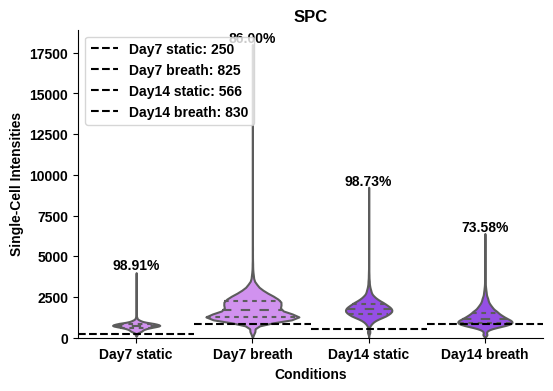

250 99.73249027237354
250 98.11898512685914
220 98.77114870881567
200 98.95749799518845
200 98.82352941176471
250 98.96894093686355
250 98.41542321404991
250 98.25125909345272
190 53.24074074074074
135 88.71617731721359
150 90.56039173014146
170 84.85254691689008
170 78.76061969015493
170 68.60859728506787
350 90.66440349175558
350 90.36375239310784
350 99.66486687767642
350 98.0121293800539
350 97.09996588195155
170 98.95833333333333
170 82.61627906976744
170 99.43644333124608
125 98.74241110147442
130 97.13914174252275
120 99.63758015054363
160 61.228641171684295
160 56.42384105960265
160 47.44101030242606


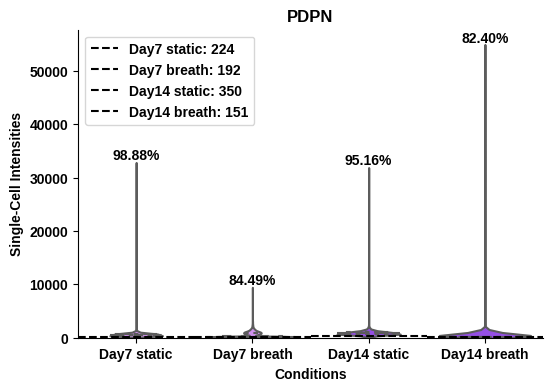

300 76.4591439688716
300 76.83727034120734
150 98.87566137566138
135 90.18422567645365
175 87.21436343852012
450 70.61105722599417
450 74.00553073814082
500 2.003205128205128
135 95.95930232558139
135 92.14151534126488
200 64.50563746747615
200 67.62028608582575
200 73.79425703930862
160 91.87437686939182


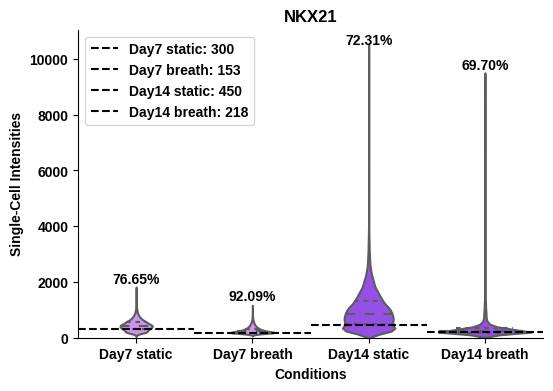

In [651]:
for channel in channels:
  
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)

        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for thresh, sc_ints in zip(threshold_series, sc_intensities):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            print(thresh, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # Add horizontal dashed lines at thresholds and text annotations
    for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
        if threshold is not None:
            ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
        # Position the percentage text above the highest value of the violin plot
        if percentage_above is not None:
            y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
            ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Single-Cell Intensities', fontweight='bold')
    
    # Add a legend
    handles, thresh_labels = ax.get_legend_handles_labels()
    full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    by_label = dict(zip(full_labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    sns.despine()
    # Show the plot
    plt.show()



In [ ]:
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
percentage = n_positive / (n_positive+n_negative) *100
sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]


## Quantify

Quantification of number of different cell types according to manually set thresholds

#### Print number of positive and negative cells

In [121]:
# channel = 1
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
print(f'Number of channel {channel} positive cells: {n_positive}')
print(f'Number of channel {channel} negative cells: {n_negative}')
percentage = n_positive / (n_positive+n_negative) *100
print(f'Percentage of positive cells: {percentage:.2f}%')


Number of channel 2 positive cells: 506
Number of channel 2 negative cells: 4065
Percentage of positive cells: 11.07%


#### Plot the number of cells either side of the threshold

/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


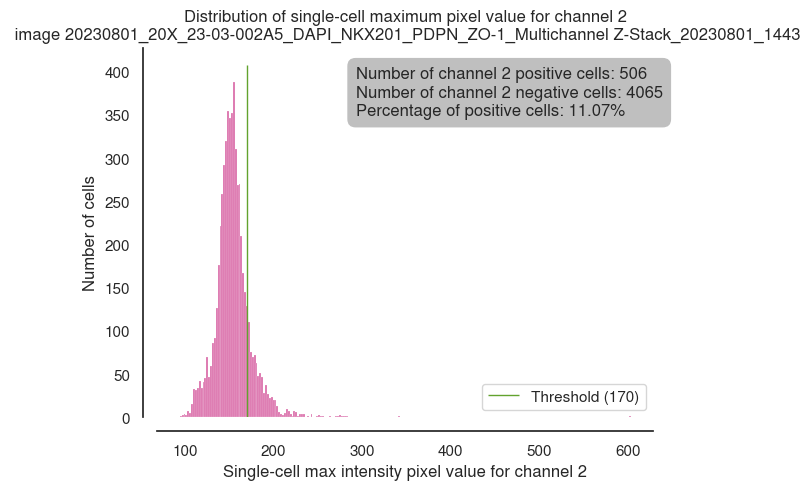

In [122]:
# sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]
ax = sns.histplot(sc_intensities)
plt.vlines(x=threshold,
           ymax=ax.get_ylim()[-1],
           ymin=ax.get_ylim()[0],
           color=sns.color_palette('PiYG')[-1],  # my favorite colors :D
           linewidth=1)
sns.despine(offset = 10)
plt.xlabel(f'Single-cell max intensity pixel value for channel {channel}')
plt.ylabel('Number of cells')
plt.legend([f'Threshold ({threshold})'], loc='lower right')
ax.text(0.4, 0.95, 
        f'Number of channel {channel} positive cells: {n_positive}\nNumber of channel {channel} negative cells: {n_negative}\nPercentage of positive cells: {percentage:.2f}%',
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='grey', edgecolor='none', alpha=0.5))

image_name = os.path.basename(image_fn).replace('.tif','')
plt.title(f'Distribution of single-cell maximum pixel value for channel {channel}\n image {image_name}')
output_fn = os.path.join(sc_base_dir, f'{image_name}_ch{channel}_threshold_quantification.png')
# plt.xlim(0,5000)
plt.savefig(output_fn, bbox_inches = 'tight', dpi = 314)

# Save out as df/excel

In [ ]:
### define parameters to plot in table
cols = ['Cell ID', f'Max. int. {channels(0).name}', f'Max. int. {channels(1).name}', f'Max. int. {channels(2).name}', f'Max. int. {channels(3).name}', 'Average X', 'Average Y']
### extract some intial measurements
df = pd.DataFrame([(track.ID, np.nanmax(track['mean_intensity-0']),np.nanmax(track['mean_intensity-1']),np.nanmax(track['mean_intensity-2']),np.nanmax(track['mean_intensity-3']), np.mean(track.x), np.mean(track.y)) for track in tracks], columns= cols)